\section{Introduction}

A continuous stirred tank reactor (CSTR) is a reactor with feed flow and exhaustion of products concurrently with an impeller for efficient mixing \cite{cite1}. Because of the continuous flow, a CSTR is an open system. This makes inlet feed control comparatively easier as the feed can be regulated as per the performance of the chemical reaction in the reactor. With the ease of feed control, complex liquid phase reactions are preferred in CSTR. Complex reactions are combinations of parallel reactions and series reactions. In this report, an isothermal CSTR reactor undertaking complex reactions is modeled based on the coursebook \cite{cite2}. The complex reactions are:

\begin{align*}
\text{A + B} &\rightarrow \text{X} \quad \text{rate constant} = k_1 \\
\text{B + X} &\rightarrow \text{Y} \quad \text{rate constant} = k_2 \\
\text{B + Y} &\rightarrow \text{Z} \quad \text{rate constant} = k_3
\end{align*}

For the modeling of the reactor, the mole balance of each component was taken. The general mole balance equation is:

\[
\text{(Rate of flow in)} - \text{(Rate of flow out)} + \text{(Rate of formation in reactor)} - \text{(Rate of consumption in reactor)} = \text{(Rate of accumulation in reactor)}
\]

Then, the mole balance equations of each species are written as:

\begin{align}
V \frac{dC_A}{dt} &= F(C_{A0} - C_A) + r_A V \label{eq:1} \\
V \frac{dC_B}{dt} &= F(C_{B0} - C_B) + r_B V \label{eq:2} \\
V \frac{dC_X}{dt} &= F(C_{X0} - C_X) + r_X V \label{eq:3} \\
V \frac{dC_Y}{dt} &= F(C_{Y0} - C_Y) + r_Y V \label{eq:4} \\
V \frac{dC_Z}{dt} &= F(C_{Z0} - C_Z) + r_Z V \label{eq:5}
\end{align}

Where, $V$ represents the volume of the reactor in $m^3$, $C$ represents the concentration of species in $kmol/m^3$, $F$ represents the flow rate in $m^3/s$, and $r$ represents the reaction rate in $kmol/m^3 \cdot s$. The indices A, B, X, Y, and Z represent the species present in the reaction.

Both sides of all reactions are divided by volume, $V$, so the differential equations are represented in mean residence time, $\tau$, since,

\[
\tau = \frac{V}{F}
\]

Assuming that the reaction is an elementary reaction, we can derive the specific rates $r$ as:

\begin{align}
r_A &= -k_1 C_A C_B \label{eq:6} \\
r_B &= -k_1 C_A C_B - k_2 C_B C_X - k_3 C_B C_X \label{eq:7} \\
r_X &= k_1 C_A C_B - k_2 C_B C_X \label{eq:8} \\
r_Y &= k_2 C_B C_X - k_3 C_B C_Y \label{eq:9} \\
r_Z &= k_3 C_B C_Y \label{eq:10}
\end{align}

Where, $k$ is the rate constant in $m^3/kmol \cdot s$. Thus, the modeling of the CSTR reactor was done by solving the five defined ordinary differential equations.


## Objectives

The objectives of the modeling are as follows:
- Visualize the change in concentration of the species with time.
- Determine the steady state concentration values of all species involved in the reaction.
- Investigate the effects of varying inlet feed concentration and residence time ('τ') on the concentration profiles.
- Analyze the impact of changing rate constants by setting $k_1 = k_2 = k_3 = 0$, and initial inlet concentrations as $C_{A0} = 1$ and $C_{B0} = 0$.


### Methodology

#### 1. Integration of Ordinary Differential Equations (ODEs)
- Imported necessary libraries including \texttt{scipy.integrate.odeint}, \texttt{matplotlib.pyplot}, and \texttt{numpy}.
- Defined initial concentrations (\texttt{Cao}, \texttt{Cbo}) and rate constants (\texttt{k1}, \texttt{k2}, \texttt{k3}).
- Developed a function \texttt{A(y, t)} to represent the reaction system with the five differential equations for concentrations of species A, B, X, Y, and Z.
- Specified initial concentrations (\texttt{y0}) and created a time array (\texttt{t}) with 500 points between 0 and 25000 seconds.
- Utilized \texttt{odeint} to solve the ODEs, obtaining the concentrations of all species over time (\texttt{sol}).
- Plotted the concentrations of A, B, X, Y, and Z against time using different linestyles and colors.

#### 2. Modification of Residence Time ($\tau$) during Reactor Operation
- Modified the function \texttt{A_modified_tau(y, t)} to adjust the residence time ($\tau$) based on the time value.
- Integrated the modified ODEs using \texttt{odeint} to simulate the reactor operation with varying residence time.
- Plotted the concentrations of A, B, X, Y, and Z against time with the modified residence time.

#### 3. Analysis of Feed Concentration Variation
- Created a new function \texttt{A(y, t, Cbo)} to incorporate different initial concentrations of species B (\texttt{Cbo}) during the reaction.
- Defined three cases with varying initial concentrations of B (\texttt{Cbo}) and simulated the reactor operation for each case.
- Plotted the concentrations of A, B, X, Y, and Z against time for each case, showcasing the effect of varying initial feed concentration.

#### 4. Investigation of Rate Constant Variations
- Developed a function \texttt{A(y, t, k1, k2, k3)} to accommodate different rate constants (\texttt{k1}, \texttt{k2}, \texttt{k3}) during the reaction.
- Specified three sets of rate constants for each reaction step and simulated the reactor operation for each set.
- Plotted the concentrations of A, B, X, Y, and Z against time for each set of rate constants, illustrating the impact of varying reaction kinetics.

#### 5. Comparison with Analytical Solution
- Implemented an analytical solution function to compute the concentrations of species A using a simplified approach (k=0).
- Simulated the reactor operation using the ODEs and plotted the concentrations of A obtained from the analytical solution alongside the numerical solution.
- Compared the results to evaluate the accuracy of the numerical simulation against the analytical solution.



## Results and Discussion
In the following section, we present the results obtained from our simulations and discuss their significance. These findings will provide insights into the behavior of the modeled systems and inform subsequent analyses.

### Problem 1
Compare the steady-state values of A, B, X, Y, Z with calculated values
obtained by solving the steady-state component balance equations for this
problem. 

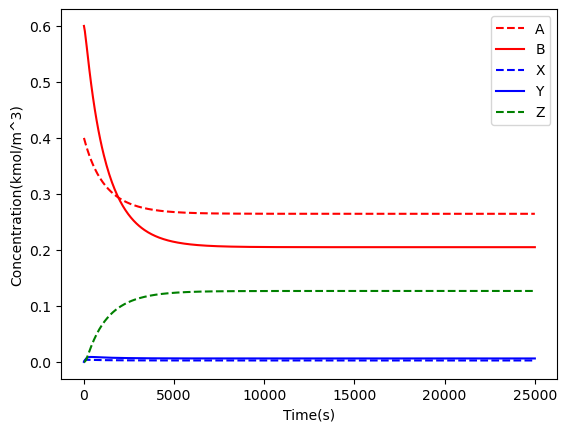

In [87]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np 

# Initial concentrations and rate constants
Cao = 0.4  # Initial concentration of A
Cbo = 0.6  # Initial concentration of B
k1 = 5e-4  # Rate constant for A + B -> X
k2 = 5e-2  # Rate constant for B + X -> Y
k3 = 2e-2  # Rate constant for B + Y -> Z
tao = 5000  # Residence time of the reactor
tstep = 500  # Number of time steps
tf = 25000  # Final time

# Define the function for the reaction system
def A(y, t):
    Ca, Cb, Cx, Cy, Cz = y  
    dCadt = (1/tao) * (Cao - Ca) - k1 * Ca * Cb  # Rate of change of A
    dCbdt = (1/tao) * (Cbo - Cb) - k1 * Ca * Cb - k2 * Cb * Cx - k3 * Cb * Cy  
    dCxdt = (1/tao) * (-Cx) + k1 * Ca * Cb - k2 * Cb * Cx 
    dCydt = (1/tao) * (-Cy) + k2 * Cb * Cx - k3 * Cb * Cy  
    dCzdt = (1/tao) * (-Cz) + k3 * Cb * Cy  
    return [dCadt, dCbdt, dCxdt, dCydt, dCzdt] 

# Initial concentrations
y0 = [0.4, 0.6, 0, 0, 0]  # Starting concentrations of A, B, X, Y, Z

t = np.linspace(0, 25000, 500)  # 500 points between 0 and 25000

# Solving the ODE
sol = odeint(A, y0, t)  # Solving the ODE using odeint

Ca, Cb, Cx, Cy, Cz = sol.T 

# Plotting the concentrations over time
plt.plot(t, Ca, 'r--', label="A")  # Plotting concentration of A
plt.plot(t, Cb, 'r', label="B")    # Plotting concentration of B
plt.plot(t, Cx, 'b--', label="X")  # Plotting concentration of X
plt.plot(t, Cy, 'b', label="Y")    # Plotting concentration of Y
plt.plot(t, Cz, 'g--', label="Z")  # Plotting concentration of Z

# Adding legend to the plot
plt.legend()

plt.xlabel("Time(s)")
plt.ylabel("Concentration(kmol/m^3)")

# Displaying the plot
plt.show()

The concentration change of species A, B, X, Y and Z by solving the ODES are plotted versus
time. The concentration change of A is smaller than concentration change of B as B
is consumed in all three reactions while A is consumed on first reaction only which can be seen
in the graph. There is negligible amount of intermediate product X and Y formed. The product Z
is formed rapidly as reactant A and B are consumed at first rapidly but decreases and comes to
constant value as consumption of A and B decreases and halts. The steady state concentration
change is achieved before 10000 seconds.

In [88]:
print("Final Concentration of A:",float("%.4f"%Ca[-1]),"kmol/m3")
print("Final Concentration of B:",float("%.4f"%Cb[-1]),"kmol/m3")
print("Final Concentration of X:",float("%.4f"%Cx[-1]),"kmol/m3")
print("Final Concentration of Y:",float("%.4f"%Cy[-1]),"kmol/m3")
print("Final Concentration of Z:",float("%.4f"%Cz[-1]),"kmol/m3")

Final Concentration of A: 0.2645 kmol/m3
Final Concentration of B: 0.2049 kmol/m3
Final Concentration of X: 0.0026 kmol/m3
Final Concentration of Y: 0.0062 kmol/m3
Final Concentration of Z: 0.1267 kmol/m3


The steady state concentrations i.e. the final concentration are printed above.

### Problem 2
Study the effect of varying residence time, feed concentration, and rate
constants on reactor performance. 

#### 1. Effect of varying residence time 

In [89]:
# Check for five consecutive same values of A
tolerance = 0.00001  # Tolerance for comparison, up to three decimal places
for i in range(len(Cb) - 4):
    if (abs(Cb[i] - Cb[i+1]) < tolerance and
        abs(Cb[i+1] - Cb[i+2]) < tolerance and
        abs(Cb[i+2] - Cb[i+3]) < tolerance and
        abs(Cb[i+3] - Cb[i+4]) < tolerance):
        # Found five consecutive same values with tolerance
        first_index_consecutive_B = i
        break

# Print the index of the first occurrence
print("Steady State postion starts at time:", t[first_index_consecutive_B])
print("Index of the first occurrence of five consecutive same values of B:", first_index_consecutive_B)

Steady State postion starts at time: 9969.939879759519
Index of the first occurrence of five consecutive same values of B: 199


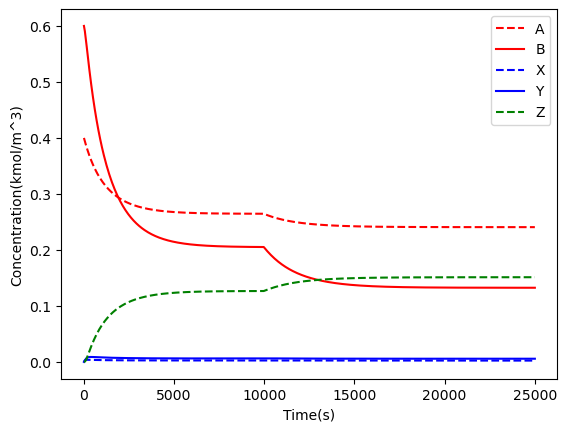

In [90]:
# Define the function for the reaction system with tau modification
def A_modified_tau(y, t):
    Ca, Cb, Cx, Cy, Cz = y  
    if t >=9970 :
        tao_modified = 10000  # Change tau to 10000 after first_index_consecutive_B
    else:
        tao_modified = 5000  # Keep tau as 5000 before first_index_consecutive_B
    dCadt = (1/tao_modified) * (Cao - Ca) - k1 * Ca * Cb  # Rate of change of A
    dCbdt = (1/tao_modified) * (Cbo - Cb) - k1 * Ca * Cb - k2 * Cb * Cx - k3 * Cb * Cy  
    dCxdt = (1/tao_modified) * (-Cx) + k1 * Ca * Cb - k2 * Cb * Cx 
    dCydt = (1/tao_modified) * (-Cy) + k2 * Cb * Cx - k3 * Cb * Cy  
    dCzdt = (1/tao_modified) * (-Cz) + k3 * Cb * Cy  
    return [dCadt, dCbdt, dCxdt, dCydt, dCzdt] 

# Solving the ODE with modified tau
sol_modified_tau = odeint(A_modified_tau, y0, t)  # Solving the ODE using odeint with modified tau

Ca_mod_tau, Cb_mod_tau, Cx_mod_tau, Cy_mod_tau, Cz_mod_tau = sol_modified_tau.T 

# Plotting the concentrations over time with modified tau
plt.plot(t, Ca_mod_tau, 'r--', label="A")  # Plotting concentration of A with modified tau
plt.plot(t, Cb_mod_tau, 'r', label="B")    # Plotting concentration of B with modified tau
plt.plot(t, Cx_mod_tau, 'b--', label="X")  # Plotting concentration of X with modified tau
plt.plot(t, Cy_mod_tau, 'b', label="Y")    # Plotting concentration of Y with modified tau
plt.plot(t, Cz_mod_tau, 'g--', label="Z")  # Plotting concentration of Z with modified tau

# Adding legend to the plot
plt.legend()

plt.xlabel("Time(s)")
plt.ylabel("Concentration(kmol/m^3)")

# Displaying the plot
plt.show()

The code introduces a modification to the function $A$ to accommodate a change in the mean residence time ($\tau$) of the reactor at a specified time interval. Initially, the function $A$ computes the rate of change of concentrations for species $A$, $B$, $X$, $Y$, and $Z$ based on the original $\tau$ value of $5,000$ seconds. However, when the time exceeds $9,970$ seconds, the function adjusts the $\tau$ value to $10,000$ seconds.

The modified function $A_{\text{modified\_tau}}$ is then utilized to solve the ordinary differential equations (ODEs) using \texttt{odeint} with the updated $\tau$ value. Finally, the concentrations of species $A$, $B$, $X$, $Y$, and $Z$ over time are plotted with the modified $\tau$ value.

After doubling the $\tau$ value from $5000$ seconds to $10000$ seconds, the concentration change of components is plotted using solid lines. With an increase in the mean residence time, the total time the reactants spend in the reactor also increases. This extended duration allows for more reactions to take place, resulting in an increase in product concentration while simultaneously decreasing reactants. This phenomenon is justified by the graph, where the product concentration is observed to increase.

#### 2. Effect of varying Feed Concentration

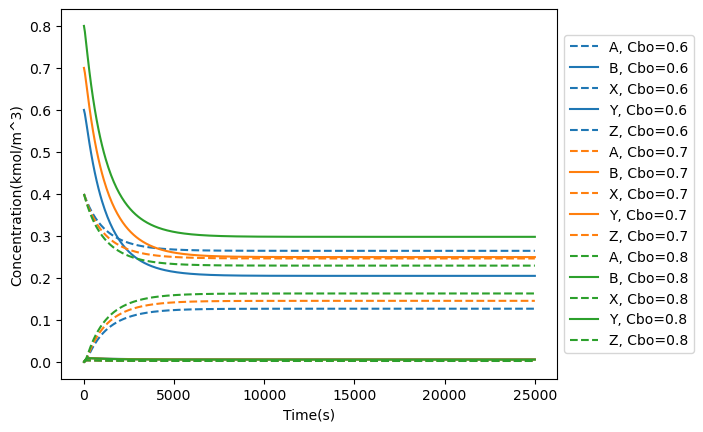

In [92]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

# Define the function for the reaction system
def A(y, t, Cbo):
    Ca, Cb, Cx, Cy, Cz = y  
    dCadt = (1/tao) * (Cao - Ca) - k1 * Ca * Cb  # Rate of change of A
    dCbdt = (1/tao) * (Cbo - Cb) - k1 * Ca * Cb - k2 * Cb * Cx - k3 * Cb * Cy  
    dCxdt = (1/tao) * (-Cx) + k1 * Ca * Cb - k2 * Cb * Cx 
    dCydt = (1/tao) * (-Cy) + k2 * Cb * Cx - k3 * Cb * Cy  
    dCzdt = (1/tao) * (-Cz) + k3 * Cb * Cy  
    return [dCadt, dCbdt, dCxdt, dCydt, dCzdt] 

# Initial concentrations and rate constants
Cao = 0.4  # Initial concentration of A
k1 = 5e-4  # Rate constant for A + B -> X
k2 = 5e-2  # Rate constant for B + X -> Y
k3 = 2e-2  # Rate constant for B + Y -> Z
tao = 5000  # Residence time of the reactor
t = np.linspace(0, 25000, 500)  # 500 points between 0 and 25000

# Feed concentration cases for B
Cbo_cases = [0.6, 0.7, 0.8]  # Three different initial concentrations of B

# Plotting the concentrations over time for each case
for i, Cbo_case in enumerate(Cbo_cases):
    y0 = [0.4, Cbo_case, 0, 0, 0]  # Starting concentrations of A, B, X, Y, Z
    sol = odeint(A, y0, t, args=(Cbo_case,))  # Solving the ODE for the current case
    Ca, Cb, Cx, Cy, Cz = sol.T 
    plt.plot(t, Ca, '--', label=f"A, Cbo={Cbo_case}", color=f"C{i}")  # Plotting concentration of A
    plt.plot(t, Cb, '-', label=f"B, Cbo={Cbo_case}", color=f"C{i}")    # Plotting concentration of B
    plt.plot(t, Cx, '--', label=f"X, Cbo={Cbo_case}", color=f"C{i}")  # Plotting concentration of X
    plt.plot(t, Cy, '-', label=f"Y, Cbo={Cbo_case}", color=f"C{i}")    # Plotting concentration of Y
    plt.plot(t, Cz, '--', label=f"Z, Cbo={Cbo_case}", color=f"C{i}")  # Plotting concentration of Z

# Adding legend to the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlabel("Time(s)")
plt.ylabel("Concentration(kmol/m^3)")

# Displaying the plot
plt.show()


The variation in feed concentration of species B has a significant impact on the concentration profiles of all species A, B, X, Y, and Z over time. As the initial concentration of B increases from 0.6 to 0.8 kmol/m^3, the concentration of A decreases, indicating higher consumption due to increased reaction rates. Conversely, the concentration of species B exhibits a proportional increase with higher initial feed concentrations. This trend suggests a direct relationship between the initial concentration of B and the rate of product formation. Overall, the observed concentration changes highlight the sensitivity of the reaction system to variations in feed concentrations, emphasizing the importance of careful control in industrial processes.

#### 3. Effect of varying Reaction system

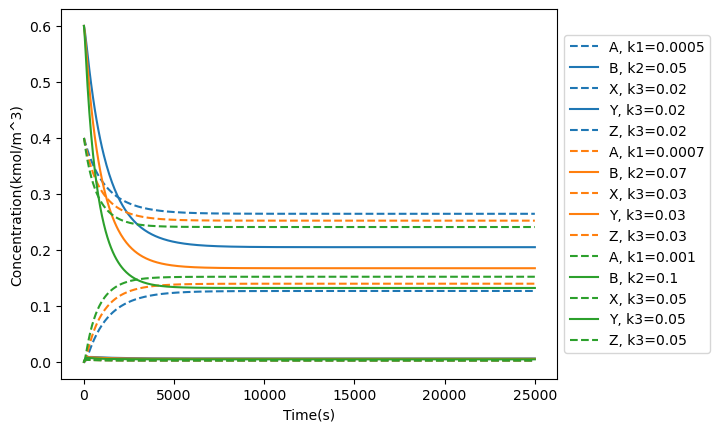

In [93]:
# Define the function for the reaction system
def A(y, t, k1, k2, k3):
    Ca, Cb, Cx, Cy, Cz = y  
    dCadt = (1/tao) * (Cao - Ca) - k1 * Ca * Cb  # Rate of change of A
    dCbdt = (1/tao) * (Cbo - Cb) - k1 * Ca * Cb - k2 * Cb * Cx - k3 * Cb * Cy  
    dCxdt = (1/tao) * (-Cx) + k1 * Ca * Cb - k2 * Cb * Cx 
    dCydt = (1/tao) * (-Cy) + k2 * Cb * Cx - k3 * Cb * Cy  
    dCzdt = (1/tao) * (-Cz) + k3 * Cb * Cy  
    return [dCadt, dCbdt, dCxdt, dCydt, dCzdt] 

# Initial concentrations and rate constants
Cao = 0.4  # Initial concentration of A
Cbo = 0.6  # Initial concentration of B
tao = 5000  # Residence time of the reactor
t = np.linspace(0, 25000, 500)  # 500 points between 0 and 25000

# Rate constant cases for k1, k2, k3
k1_cases = [5e-4, 7e-4, 1e-3]  # Three different values of k1
k2_cases = [5e-2, 7e-2, 1e-1]  # Three different values of k2
k3_cases = [2e-2, 3e-2, 5e-2]  # Three different values of k3

# Plotting the concentrations over time for each case
for i, (k1_case, k2_case, k3_case) in enumerate(zip(k1_cases, k2_cases, k3_cases)):
    y0 = [0.4, 0.6, 0, 0, 0]  # Starting concentrations of A, B, X, Y, Z
    sol = odeint(A, y0, t, args=(k1_case, k2_case, k3_case))  # Solving the ODE for the current case
    Ca, Cb, Cx, Cy, Cz = sol.T 
    plt.plot(t, Ca, '--', label=f"A, k1={k1_case}", color=f"C{i}")  # Plotting concentration of A
    plt.plot(t, Cb, '-', label=f"B, k2={k2_case}", color=f"C{i}")    # Plotting concentration of B
    plt.plot(t, Cx, '--', label=f"X, k3={k3_case}", color=f"C{i}")  # Plotting concentration of X
    plt.plot(t, Cy, '-', label=f"Y, k3={k3_case}", color=f"C{i}")    # Plotting concentration of Y
    plt.plot(t, Cz, '--', label=f"Z, k3={k3_case}", color=f"C{i}")  # Plotting concentration of Z

plt.xlabel("Time(s)")
plt.ylabel("Concentration(kmol/m^3)")

# Placing the legend at the side
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Displaying the plot
plt.show()

The concentration profiles of species A, B, X, Y, and Z were simulated for varying values of the rate constants $k_1$, $k_2$, and $k_3$. Each set of rate constants was applied to the reaction system defined by the function $A$, resulting in distinct concentration changes over time. Notably, increasing the values of $k_1$, $k_2$, or $k_3$ led to faster consumption of reactants A and B and higher production rates of intermediate and final products X, Y, and Z. Conversely, decreasing the rate constants exhibited the opposite effect, slowing down reaction rates and altering the final product concentrations. These results demonstrate the crucial role of rate constants in determining the kinetics and outcomes of chemical reactions within the system.

### Problem 3:
Note that when kl = k2 = k3 = 0, CAO = 1, CBO = 0, the program solves the
case of a step input of tracer solution, which can be used to generate the
typical F-diagram for a single perfectly mixed tank. Compare this result
with the analytical solution. 

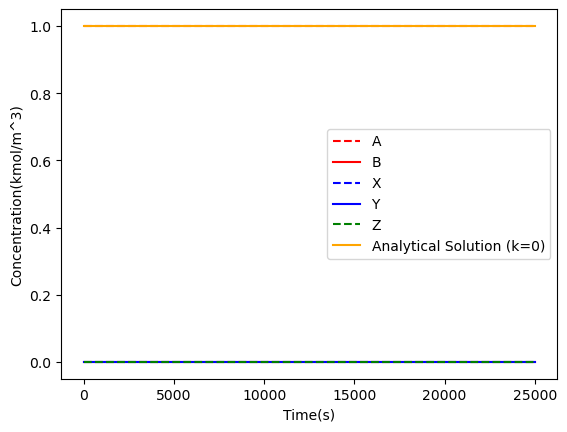

In [94]:
# Rate constants
k1 = k2 = k3 = 0
# Initial concentrations
Cao = 1
Cbo = 0
# Residence time of the reactor
tao = 5000
# Time points
t = np.linspace(0, 25000, 500)

# Analytical solution for F-diagram
def analytical_solution(t, Cao, k):
    return Cao / (1 + k * t)

# Define the function for the reaction system
def A(y, t):
    Ca, Cb, Cx, Cy, Cz = y  
    dCadt = (1/tao) * (Cao - Ca) - k1 * Ca * Cb  # Rate of change of A
    dCbdt = (1/tao) * (Cbo - Cb) - k1 * Ca * Cb - k2 * Cb * Cx - k3 * Cb * Cy  
    dCxdt = (1/tao) * (-Cx) + k1 * Ca * Cb - k2 * Cb * Cx 
    dCydt = (1/tao) * (-Cy) + k2 * Cb * Cx - k3 * Cb * Cy  
    dCzdt = (1/tao) * (-Cz) + k3 * Cb * Cy  
    return [dCadt, dCbdt, dCxdt, dCydt, dCzdt] 

# Initial concentrations
y0 = [Cao, Cbo, 0, 0, 0]  # Starting concentrations of A, B, X, Y, Z

# Solving the ODE
sol = odeint(A, y0, t)  # Solving the ODE using odeint
Ca, Cb, Cx, Cy, Cz = sol.T 

# Plotting the concentrations over time
plt.plot(t, Ca, 'r--', label="A")  # Plotting concentration of A
plt.plot(t, Cb, 'r', label="B")    # Plotting concentration of B
plt.plot(t, Cx, 'b--', label="X")  # Plotting concentration of X
plt.plot(t, Cy, 'b', label="Y")    # Plotting concentration of Y
plt.plot(t, Cz, 'g--', label="Z")  # Plotting concentration of Z

# Analytical solution plot
k = 0
plt.plot(t, analytical_solution(t, Cao, k), label="Analytical Solution (k=0)", color='orange')

plt.xlabel("Time(s)")
plt.ylabel("Concentration(kmol/m^3)")
plt.legend()
plt.show()

Above graph represents the step input of the tracer solution where rate constants \( k_1 = k_2 = k_3 = 0 \, \text{m}^3/\text{kmol} \cdot \text{s} \) and inlet feed concentration \( C_{A0} = 1 \, \text{kmol/m}^3 \) and \( C_{B0} = 0 \, \text{kmol/m}^3 \).

## Conclusion

In conclusion, the Continuous Stirred Tank Reactor (CSTR) proves to be an effective open system for regulating complex reactions due to its continuous operation and ease of control. Increasing the residence time ($\tau$) results in enhanced product formation, while elevating the rate constant ($k_1$) accelerates the consumption of reactants. Conversely, reducing the initial concentration of A leads to lower product concentrations. These findings underscore the importance of reactor design and operational parameters in optimizing chemical processes within CSTRs.
